## Import Packages

In [7]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../utils")

from timeslots import timeslot_times
import utils_functions

## Import Optimal Data

In [8]:
group1_optimal = utils_functions.read_optimal_txt("../data/group1_results.txt")
group2_optimal = utils_functions.read_optimal_txt("../data/group2_results.txt")

In [9]:
# Map selected columns to number of occupied rooms.
num_members_to_rooms = {
  0: 0,
  6: 1,
  12: 2,
  18: 3,
  24: 4,
}

group1_rooms_used_per_timeslot = {}
for pattern in group1_optimal:
  group1_rooms_used_per_timeslot[pattern[0]] = num_members_to_rooms[sum(pattern[1])]

group2_rooms_used_per_timeslot = {}
for pattern in group2_optimal:
  group2_rooms_used_per_timeslot[pattern[0]] = num_members_to_rooms[sum(pattern[1])]

# Merge both dictionaries
rooms_per_timeslot = group1_rooms_used_per_timeslot.copy()
for key, value in group2_rooms_used_per_timeslot.items():
  if key in rooms_per_timeslot:
    rooms_per_timeslot[key] += value
  else:
    rooms_per_timeslot[key] = value
  if rooms_per_timeslot[key] > 4:
    print(f"ERROR! Overbooking in timeslot {key}")

print(dict(sorted((rooms_per_timeslot.items()))))

{1: 1, 2: 1, 3: 1, 6: 4, 7: 3, 8: 3, 9: 1, 10: 2, 11: 1, 12: 1, 13: 3, 16: 1, 18: 3, 19: 3, 22: 1, 23: 1, 24: 2, 25: 1, 27: 2, 28: 2, 30: 4, 31: 2, 32: 1, 33: 1, 34: 3, 35: 1, 36: 2, 37: 1, 38: 1, 39: 1, 40: 3, 41: 1, 42: 2, 43: 3, 44: 1, 45: 1, 47: 3, 49: 1, 51: 1, 52: 1, 53: 2, 55: 1, 56: 3, 57: 2, 58: 3, 59: 1, 61: 1, 62: 2, 63: 2, 64: 1, 65: 1, 66: 1, 67: 3, 68: 2, 69: 1, 71: 1, 72: 1, 73: 1, 74: 3, 75: 3, 76: 1, 77: 2, 78: 1, 79: 1, 80: 3, 81: 2, 84: 1, 85: 2, 86: 2, 87: 1, 89: 1, 90: 2, 91: 2, 92: 2, 93: 2, 94: 1, 95: 2, 96: 1, 98: 3, 100: 1, 101: 3, 102: 2, 103: 2, 104: 1, 105: 1, 106: 1, 107: 1, 108: 2, 109: 3, 110: 1, 111: 2, 112: 1, 113: 1, 114: 2, 119: 1, 120: 1, 121: 1, 123: 1, 124: 2, 125: 2, 126: 1, 127: 3, 129: 2, 130: 3, 131: 2, 132: 4, 133: 2, 134: 2, 135: 1, 136: 2, 137: 2, 138: 2, 139: 1, 140: 2, 142: 2, 143: 2, 145: 2, 146: 2, 148: 1, 149: 3, 151: 1, 152: 2, 153: 2, 154: 2, 155: 1, 157: 3, 159: 1, 161: 3, 162: 1, 164: 1, 165: 1, 166: 3, 167: 2, 168: 3, 169: 1, 170: 

## Display Master Schedule

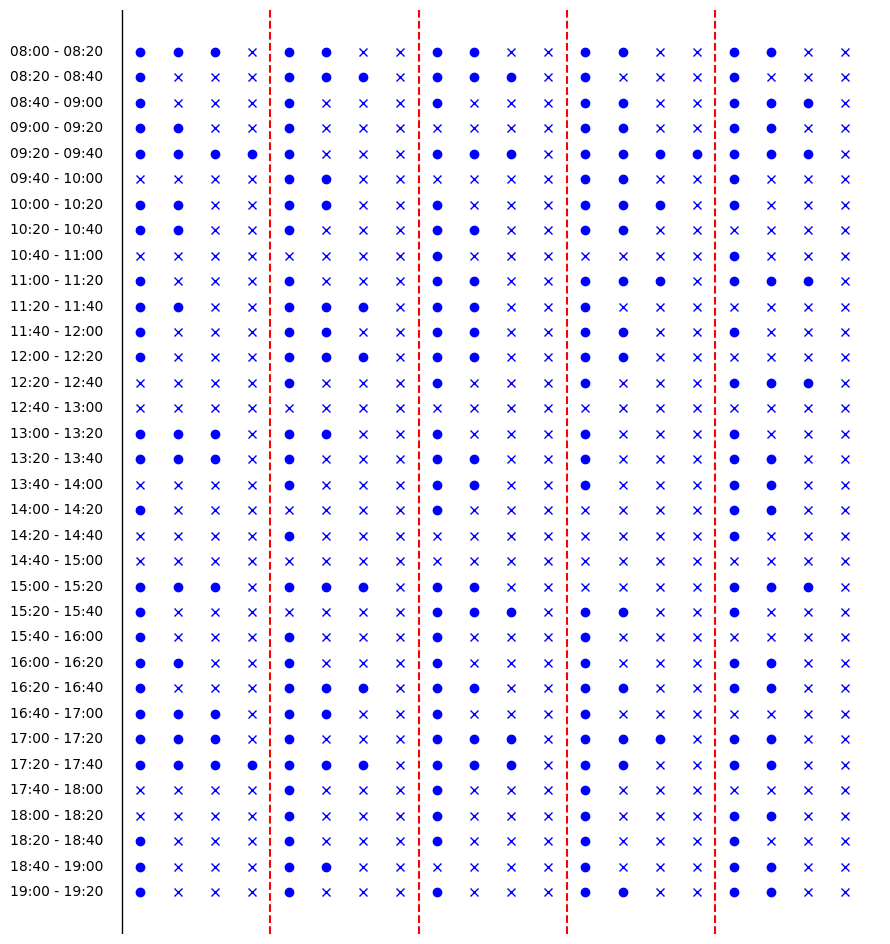

In [10]:
# Define the grid dimensions
rows = 34
cols = 20

plt.figure(1, (10, 12))
for i in range(cols):
  for j in range(rows):
    day = int(i/4)
    room = i%4+1
    timeslot = (j+1) + (day*rows)
    style = "bx"
    if timeslot in rooms_per_timeslot and rooms_per_timeslot[timeslot] >= room:
      style = "bo"
    plt.plot(i, j, style)

# Group columns into subsets of 4 and draw lines to separate the groups
for col in range(4, cols, 4):
    plt.axvline(x=col - 0.5, color='red', linestyle='--')

# Draw a vertical bar to separate labels from dots
plt.axvline(x=-0.5, color='black', linewidth=1)

# Add flipped labels to the rows (8:00 - 8:20 on the top)
for i, label in enumerate(reversed(timeslot_times)):
    plt.text(-1, i, label, va='center', ha='right')

plt.axis('off')

plt.savefig(f"../data/schedules/master_schedule.png", bbox_inches="tight")
plt.show()